![Astrofisica Computacional](../logo.PNG)

---
## 02. Motion of a Photon in The Schwarzschild Spacetime II


Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Summary

In this notebook we improve the code that integrates the equations of motion for one photon. 


---

---

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from schwarzschild import *

### Schwarzschild Metric

The information concerning the background spacetime is now implemented in the module file `schwarzschild.py`.

### Initial Conditions

In [2]:
def initCond(x, k, metric):
    '''
    Given the initial conditions (x,k)
    this function returns the list
    [t, r, theta, phi, k_t, k_r, k_theta, k_phi] 
    with the initial conditions needed to solve 
    the geodesic equations 
    (with the covariant components of the momentum vector)    
    # Coordinates and momentum components
    t = x[0]
    r = x[1]
    theta = x[2]
    phi = x[3]
    '''
    
    kr, kth, kphi = k
    
    # Metric components
    g_tt, g_rr, g_thth, g_phph = metric(x, M=M)
    kt = np.sqrt(-(g_rr*kr**2 + g_thth*kth**2 + g_phph*kphi**2)/g_tt)
    
    # Lower k-indices
    k_t = g_tt*kt 
    k_r = g_rr*kr
    k_th = g_thth*kth
    k_phi = g_phph*kphi
    
    return [x[0], x[1], x[2], x[3], k_t, k_r, k_th, k_phi]

### Plot

In [3]:
def plot(sol, plot_ps=True):
    '''
    2D plot of the test particle trajectory
    '''
    indx = len(sol[:,1])
    for i in range(indx):
        if sol[i,1]<2.+1e-10: 
            indx = i
            break
    x = sol[:indx,1]*np.cos(sol[:indx,3])
    y = sol[:indx,1]*np.sin(sol[:indx,3])
    
    BH = plt.Circle((0, 0), 2*M, color='k')
    ps = plt.Circle((0, 0), 3*M, fill=False, linestyle=':', label='Photon Sphere')
    
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.add_patch(BH)
    if plot_ps:
        ax.add_patch(ps)
    ax.plot(x,y, color='crimson', label='Test particle')
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.grid(alpha=0.2)
    ax.axvline(0, c='k', alpha=0.1)
    ax.axhline(0, c='k', alpha=0.1)
    plt.legend()
    plt.show()

---
## Integration

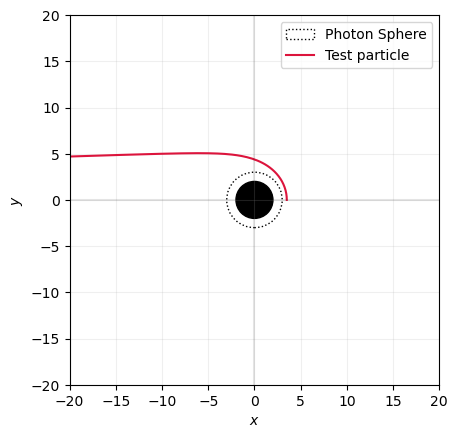

In [4]:
M = 1

# Initial Conditions
t0 = 0.
r0 = 3.5*M
theta0 = np.pi/2
phi0 = 0.

kr0 = 0.
kth0 = 0.
kphi0 = 1

x = [t0, r0, theta0, phi0]
k = [kr0, kth0,kphi0]

ic = initCond(x, k, g)

# Independent parameter range
lmbda = np.linspace(0,40,400)

# Integration and plot
sol = odeint(geodesics, ic, lmbda, args=(M,))
plot(sol)

### Impact Parameter and the Shadow of the Black Hole

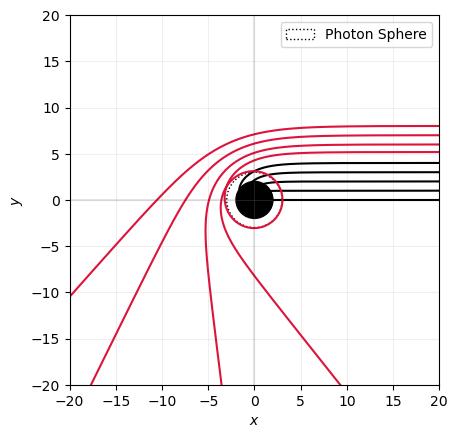

In [5]:
def plotmany(p_coords):
    '''
    2D plot of the many photons moving towards the BH
    with different impact parameters
    '''
    BH = plt.Circle((0, 0), 2*M, color='k')
    ps = plt.Circle((0, 0), 3*M, fill=False, linestyle=':', label='Photon Sphere')
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.add_patch(BH)
    ax.add_patch(ps)
    
    lmbda = np.linspace(0,60,500)
    for p in p_coords:
        color = 'crimson'
        sol = odeint(geodesics, p, lmbda, args=(M,))
        indx = len(sol[:,1])
        for i in range(indx):
            if sol[i,1]<2.+1e-10: 
                indx = i
                color = 'black'
                break
        x = sol[:indx,1]*np.cos(sol[:indx,3])
        y = sol[:indx,1]*np.sin(sol[:indx,3])
        ax.plot(x,y, color=color)

    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.grid(alpha=0.2)
    ax.axvline(0, c='k', alpha=0.1)
    ax.axhline(0, c='k', alpha=0.1)
    plt.legend()
    plt.show()



M = 1

# Initial Conditions
t0 = 0.
theta0 = np.pi/2
kth0 = 0.

yy = [0,1,2,3,4,5.181,6,7,8] # Initial 'y' coordinates
p_coords = []

# define coordinates of the incident photons
for y0 in yy:
    x0 = 20
    
    r0 = np.sqrt(x0**2 + y0**2)
    phi0 = np.arctan(y0/x0)

    v0 = 1
    kr0 = -v0*np.cos(phi0)
    kphi0 = v0*np.sin(phi0)/r0

    x = [t0, r0, theta0, phi0]
    k = [kr0, kth0, kphi0]

    ic = initCond(x, k, g)
    p_coords.append(ic)

# Integrate and plot
plotmany(p_coords)